In [1]:
import streamlit as st
import pandas as pd
import plotly.express as px


In [3]:
diagnostica_m = pd.read_csv("aval diagnostica saers 2025 - 5 ano - matematica.csv", delimiter=";")

In [10]:
diagnostica_p = pd.read_csv("aval diagnostica saers 2025 - 5 ano - portugues.csv", delimiter=";", encoding="latin-1")

In [12]:
diagnostica_mp = pd.concat([diagnostica_m, diagnostica_p], ignore_index=True )

In [24]:
diagnostica_mp.head(3)

,AVALIAÇÃO,REDE,ANO ESCOLAR,COMPONENTE CURRICULAR,ENTIDADE,HABILIDADE - POSIÇÃO (CÓDIGO),HABILIDADE - DESCRIÇÃO,HABILIDADE - ACERTO %,HABILIDADE - FAIXA
0,AVALIAÇÃO DIAGNÓSTICA 2025,ESTADUAL,ENSINO FUNDAMENTAL DE 9 ANOS - 5º ANO,MT,INST ESTADUAL PADRE CAETANO,H 01 (D001_M),Identificar a localização ou a movimentação de...,95,Alto
1,AVALIAÇÃO DIAGNÓSTICA 2025,ESTADUAL,ENSINO FUNDAMENTAL DE 9 ANOS - 5º ANO,MT,INST ESTADUAL PADRE CAETANO,H 02 (D002_M),Reconhecer características do sistema de numer...,86,Alto
2,AVALIAÇÃO DIAGNÓSTICA 2025,ESTADUAL,ENSINO FUNDAMENTAL DE 9 ANOS - 5º ANO,MT,INST ESTADUAL PADRE CAETANO,H 03 (D003_M),Identificar composições ou decomposições de nú...,23,Baixo


In [18]:
simulado_m = pd.read_csv("simulado saeb 2025 - 5 ano - matematica.csv",delimiter=";")
simulado_p = pd.read_csv("simulado saeb 2025 - 5 ano - portugues.csv",delimiter=";")
simulado_mp = pd.concat([simulado_m, simulado_p], ignore_index=True )

In [25]:
simulado_mp.head(3)

,AVALIAÇÃO,REDE,ANO ESCOLAR,COMPONENTE CURRICULAR,ENTIDADE,HABILIDADE - POSIÇÃO (CÓDIGO),HABILIDADE - DESCRIÇÃO,HABILIDADE - ACERTO %,HABILIDADE - FAIXA
0,SIMULADO SAEB,ESTADUAL,ENSINO FUNDAMENTAL DE 9 ANOS - 5º ANO,MT,INST ESTADUAL PADRE CAETANO,H 01 (D001_M),Identificar a localização ou a movimentação de...,92,Alto
1,SIMULADO SAEB,ESTADUAL,ENSINO FUNDAMENTAL DE 9 ANOS - 5º ANO,MT,INST ESTADUAL PADRE CAETANO,H 02 (D002_M),Reconhecer características do sistema de numer...,100,Alto
2,SIMULADO SAEB,ESTADUAL,ENSINO FUNDAMENTAL DE 9 ANOS - 5º ANO,MT,INST ESTADUAL PADRE CAETANO,H 03 (D003_M),Identificar composições ou decomposições de nú...,92,Alto


In [ ]:
# col HABILIDADE - FAIXA == Baixo OU Médio Baixo
# col HABILIDADE - ACERTO %
# col HABILIDADE - DESCRIÇÃO

In [26]:
df_filtrado_diagnostica = diagnostica_mp[diagnostica_mp["HABILIDADE - FAIXA"].isin(["Baixo", "Médio Baixo"])]

In [27]:
df_filtrado_diagnostica = df_filtrado_diagnostica.sort_values("HABILIDADE - ACERTO %")

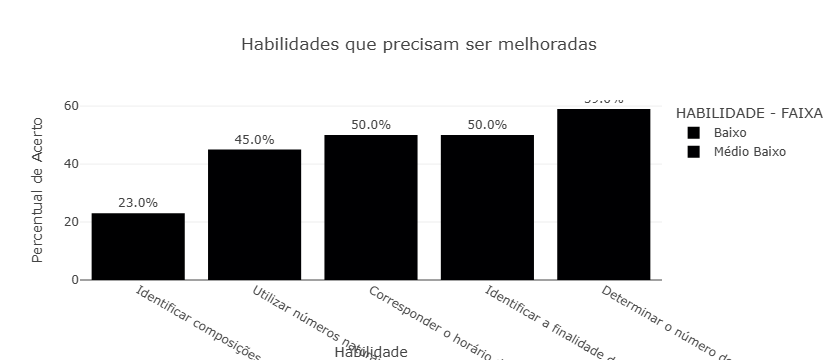

In [28]:
fig = px.bar(
    df_filtrado_diagnostica,
    x="HABILIDADE - DESCRIÇÃO",
    y="HABILIDADE - ACERTO %",
    color="HABILIDADE - FAIXA",
    title="Habilidades que precisam ser melhoradas",
    text="HABILIDADE - ACERTO %"
)

fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(xaxis_title="Habilidade", yaxis_title="Percentual de Acerto")

In [ ]:
st.plotly_chart(fig, use_container_width=True)